# Homework

Write algorithm which uses good points from both algorithms i.e. insertion sort and merge sort. You also need to complete the cost analysis for both algorithms. Execute on several inputs with best, average and worst cases and plot graphs which shows comparison of your algorithm with actual insertion and merge sort algorithm.

In [75]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Insertion Sort

In [76]:
def InsertionSort(Array):
    for j in range(1,len(Array)):
       key = Array[j]
       i = j-1
       while i>=0 and Array[i]>key:
           Array[i+1] = Array[i]
           i = i-1
       Array[i+1] = key
    return Array;

# Merge Sort

In [77]:
def merge(L, R):
    i = 0 # current index in the L array
    j = 0 # current index in the R array
    ret = []
    while i < len(L) and j < len(R):
        if L[i] < R[j]:
            ret.append(L[i])
            i += 1
        else:   # ties go to R.  Doesn't really matter.
            ret.append(R[j])
            j += 1
    while i < len(L):
        ret.append(L[i])
        i += 1
    while j < len(R):
        ret.append(R[j])
        j+= 1
    return ret
        
def mergeSort(A):
    n = len(A)
    if n <= 1:
        return A
    L = mergeSort(A[:round(n/2)])
    R = mergeSort(A[round(n/2):n])
    return merge(L,R)

# Combine Algorithm

In [78]:
def mergeAlgo(A):
    n = len(A)
    if n <= 1:
        return A
    L = InsertionSort(A[:round(n/2)])
    R = InsertionSort(A[round(n/2):n])
    return merge(L,R)

# Testing of Combine Algorithm : 

In [79]:
# Best Case: Input Array was already sorted.
A = [1,3,5,8,9,11,12]
print (mergeAlgo(A))

[1, 3, 5, 8, 9, 11, 12]


In [80]:
# Avg Case: Input Array was randomly sorted.
A = [1,5,6,8,9,23,88,54,101,96]
print (mergeAlgo(A))

[1, 5, 6, 8, 9, 23, 54, 88, 96, 101]


In [81]:
# Worst Case: Input Array was reverse sorted
A = [12,11,9,8,5,3,1]
print (mergeAlgo(A))

[1, 3, 5, 8, 9, 11, 12]


# Graphs 

comparison of Combine algorithm with actual insertion and merge sort algorithm.

In [82]:
from tryItABunch import tryItABunch
nValuesInsertion, tValuesInsertion = tryItABunch( InsertionSort, startN = 50, endN = 1050, stepSize=50, numTrials=5, listMax = 10)
nValuesMerge, tValuesMerge = tryItABunch( mergeSort, startN = 50, endN = 1050, stepSize=50, numTrials=10, listMax = 10)
nValues, tValues = tryItABunch( mergeAlgo, startN = 50, endN = 1050, stepSize=50, numTrials=5, listMax = 10)

Text(0.5, 1.0, 'All sorts of sorts')

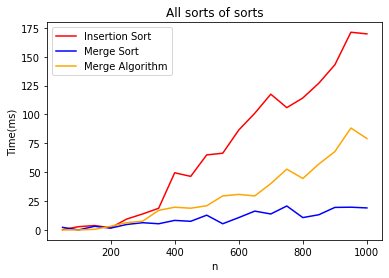

In [83]:
plt.plot(nValuesInsertion, tValuesInsertion, color="red", label="Insertion Sort")
plt.plot(nValuesMerge, tValuesMerge, color="blue", label="Merge Sort")
plt.plot(nValues, tValues, color="orange", label="Merge Algorithm")
plt.xlabel("n")
plt.ylabel("Time(ms)")
plt.legend()
plt.title("All sorts of sorts")


# Cost Analysis of Insertion and merge sort

# Best Case:

Text(0.5, 1.0, 'n vs nlog(n)')

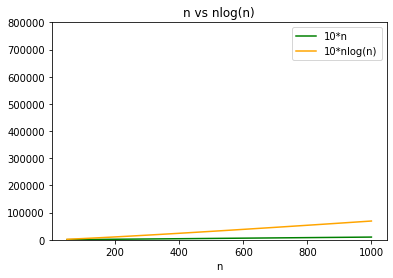

In [84]:
plt.plot(nValuesMerge, [10*x for x in nValuesMerge], color="green", label="10*n")
plt.plot(nValuesMerge, [10*x*np.log(x) for x in nValuesMerge], color="orange", label="10*nlog(n)")
plt.xlabel("n")
plt.ylim(0,800000)
plt.legend()
plt.title("n vs nlog(n)")

# Average Case\ Worst Case:

Text(0.5, 1.0, 'n^2 vs nlog(n)')

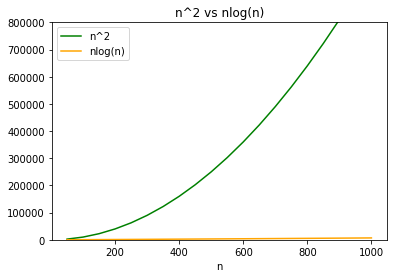

In [85]:
plt.plot(nValuesMerge, [x**2 for x in nValuesMerge], color="green", label="n^2")
plt.plot(nValuesMerge, [x*np.log(x) for x in nValuesMerge], color="orange", label="nlog(n)")


plt.xlabel("n")
plt.ylim(0,800000)
plt.legend()
plt.title("n^2 vs nlog(n)")

# Find out at what values of n, merge sort works better than insertion sort or vice versa. Similarly, do this for your own algorithm as well.

# Result:

 --> Insertion sort works better for those values of n where input array was already sorted (Best Case).



--> Merge sort works better for those values of n where input array was randomly sorted(Average Case) or reverse sorted(Worst Case).


--> Combine Algorithm works better for those values of n where input array was already sorted (Best Case).